# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Model , Sequential 
from tensorflow.keras.layers import Dense , Conv2D , BatchNormalization , Input , MaxPooling2D , Flatten , Dropout , ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import cv2 as cv
from warnings import filterwarnings
filterwarnings("ignore")

2023-12-25 12:34:41.508425: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Loading Data

In [2]:
clss = os.listdir("data/train")
clss

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [3]:
X_train = []
y_train = []
for cls in clss:
  path = f"data/train/{cls}"
  img_name = os.listdir(path)
  for cl in img_name:
      img_path = f"{path}/{cl}"
      img = plt.imread(img_path)
      X_train.append(img)
      y_train.append(cls)
      
    


In [4]:
x_test = []
y_test = []
for cls in clss:
  path = f"data/test/{cls}"
  img_name = os.listdir(path)
  for cl in img_name:
      img_path = f"{path}/{cl}"
      img = plt.imread(img_path)
      x_test.append(img)
      y_test.append(cls)

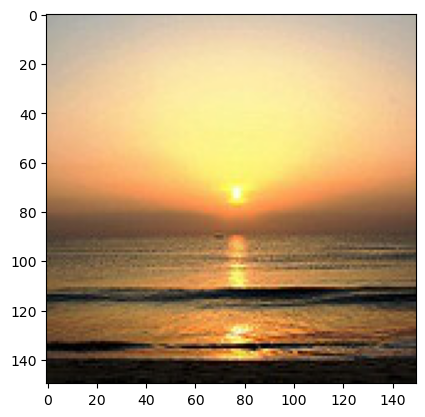

In [5]:
plt.imshow(X_train[11500])

In [6]:
y_train[11500]

'sea'

# Resizing images to (28,28) pxl

In [7]:
X_train = np.array([cv.resize(img, (28, 28)) for img in X_train])
X_test = np.array([cv.resize(img, (28, 28)) for img in x_test])

In [8]:
np.shape(X_train)

(14034, 28, 28, 3)

# Spliting Data

In [9]:
X_train , X_val , y_train , y_val = train_test_split(X_train , y_train , test_size=.1 , shuffle=True)

# Normalization Data

In [10]:
X_train = X_train /255
X_test = X_test /255
X_val = X_val /255

# Encoding the (y)

In [11]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)

# Deep Learning Model

In [12]:
input_shape = X_train.shape[1:]
input_shape

(28, 28, 3)

# Len Model

In [13]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same', activation='relu', input_shape=((input_shape))),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(rate=0.5),
    Conv2D(filters=64, kernel_size=(5, 5), strides=1, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(rate=0.5),
    Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Flatten(),
    Dropout(rate=0.5),
    Dense(units=6, activation='softmax'),
])

2023-12-25 12:36:58.513057: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              metrics=["accuracy"],
                  optimizer=Adam(learning_rate=0.0001))

In [15]:

history = model.fit(X_train, y_train, epochs=100, batch_size = 32 ,  validation_data=[X_val, y_val])

Epoch 1/100
395/395 [==============================] - 20s 48ms/step - loss: 1.7070 - accuracy: 0.2685 - val_loss: 1.5439 - val_accuracy: 0.4152
Epoch 2/100
395/395 [==============================] - 25s 63ms/step - loss: 1.4259 - accuracy: 0.4110 - val_loss: 1.3990 - val_accuracy: 0.4459
Epoch 3/100
395/395 [==============================] - 22s 56ms/step - loss: 1.3227 - accuracy: 0.4584 - val_loss: 1.3129 - val_accuracy: 0.4950
Epoch 4/100
395/395 [==============================] - 24s 62ms/step - loss: 1.2402 - accuracy: 0.4991 - val_loss: 1.2322 - val_accuracy: 0.5356
Epoch 5/100
395/395 [==============================] - 25s 63ms/step - loss: 1.1746 - accuracy: 0.5257 - val_loss: 1.1682 - val_accuracy: 0.5513
Epoch 6/100
395/395 [==============================] - 25s 62ms/step - loss: 1.1152 - accuracy: 0.5567 - val_loss: 1.0995 - val_accuracy: 0.6161
Epoch 7/100
395/395 [==============================] - 26s 66ms/step - loss: 1.0634 - accuracy: 0.5802 - val_loss: 1.0352 - val_ac

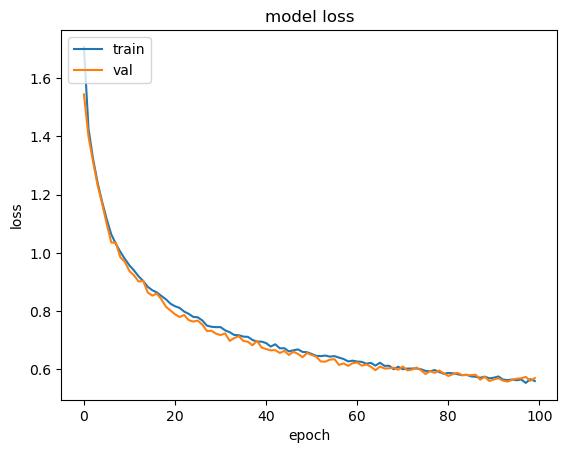

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

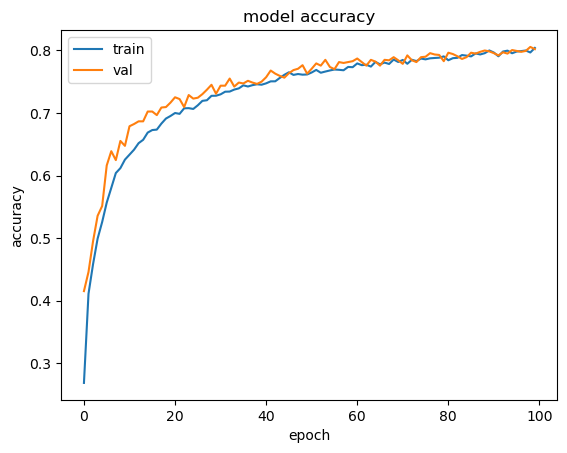

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
model.evaluate(X_train , y_train)

395/395 [==============================] - 5s 12ms/step - loss: 0.4807 - accuracy: 0.8405


[0.48067569732666016, 0.8405383825302124]

In [19]:
model.evaluate(X_test , y_test)

94/94 [==============================] - 1s 12ms/step - loss: 0.5516 - accuracy: 0.8087


[0.55155348777771, 0.8086666464805603]